<a href="https://colab.research.google.com/github/Jsk10101/PlanetarySci/blob/main/NASA_Exoplanet_data_explorer_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tab = astropy.io.ascii.read("/content/drive/MyDrive/College/Junior/Planetary Science/Colab Notebooks/PS_2025.01.16_06.39.23.csv",)

In [4]:
print(tab.colnames)

['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

(0.01, 10)

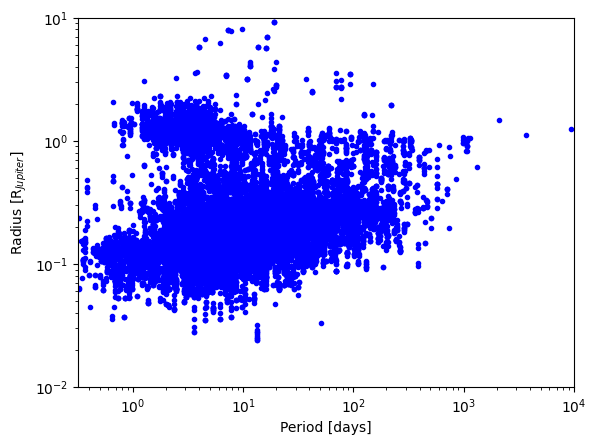

In [5]:
plt.plot(tab["pl_orbper"], tab["pl_radj"], "b.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radius [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**4)
plt.ylim(10**(-2), 10)

## 1, How about Mass-Period plot, Mass-Semi-major axis plot, etc? How different are they and why?


Text(0, 0.5, 'Mass [M$_{Earth}$]')

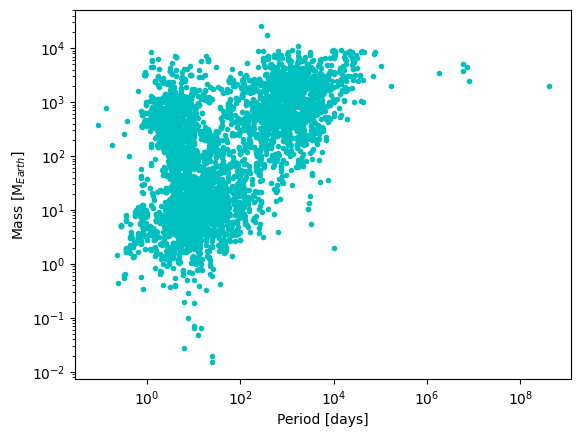

In [6]:
plt.plot(tab["pl_orbper"], tab["pl_bmasse"], "c.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")

Text(0, 0.5, 'Mass [M$_{Earth}$]')

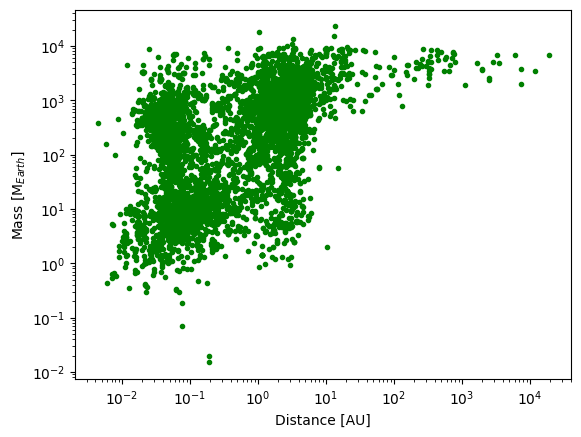

In [13]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "g.")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")

## 2, Overplot solar system planets on the above plot?

In [12]:
Solar_system = {'Name': ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter',],
                'Mass': [0.055, 0.815, 1, 0.107, 318, 95, 14.5, 17],
                'SM-axis': [0.387, 0.723, 1, 1.52, 5.2, 9.54, 19.9, 30.1],
                'Period': [88, 225, 365, 687, 4333, 10759, 30687, 60190]}

Text(0, 0.5, 'Mass [M$_{Earth}$]')

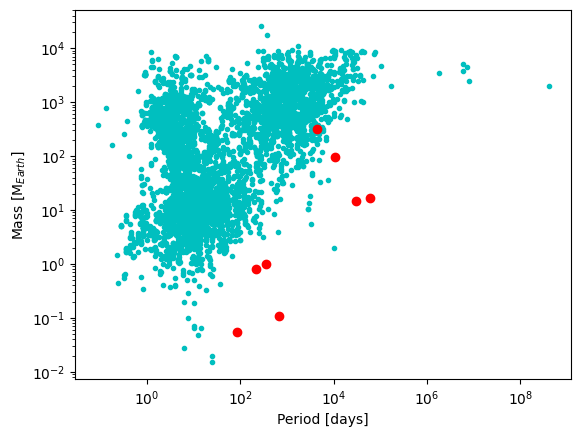

In [15]:
plt.plot(tab["pl_orbper"], tab["pl_bmasse"], "c.")
plt.plot(Solar_system["Period"], Solar_system["Mass"], "ro")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Mass [M$_{Earth}$]")

Text(0, 0.5, 'Mass [M$_{Earth}$]')

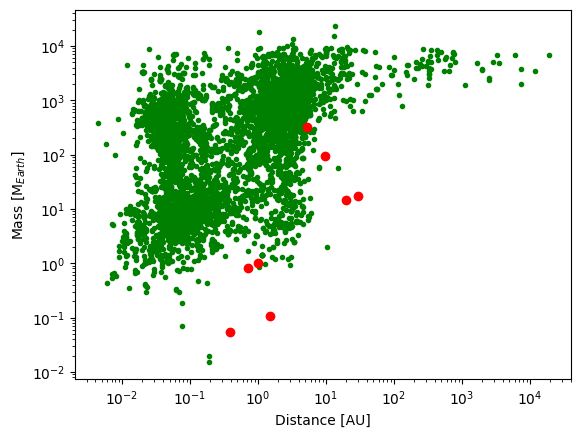

In [32]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], "g.")
plt.plot(Solar_system["SM-axis"], Solar_system["Mass"], "ro")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")

## 3, Research on the state-of-the-art performance of each detection technique and overplot the sensitivity line.

# Transit Sensitivity

For a given planet to earth ratio, the sensitivity of the signal is:
$ (\frac{R_p}{R_E})^2 = 3 \sqrt{\frac{P}{T}} $ \


This equation is used below:


In [18]:
# Import Constants and Units
import astropy.constants as ac
import astropy.units as u

In [20]:
# Makes a set of data points from 10^0 to 10^3 at increments of 0.01
P_arr = 10**np.arange(0,4,0.01) * u.day # Orbital Period in Days
T = 1 * u.year # Time Window (365 chances to observe)

# Sensitivity of Signal
R_p_arr = np.sqrt(3 * np.sqrt(P_arr / T)) * u.earthRad # In Earth Radii

# Specify Planets only discovered by Transits
Tsit = np.where(tab["default_flag"] == 1 & (tab["discoverymethod"] == "Transit"))

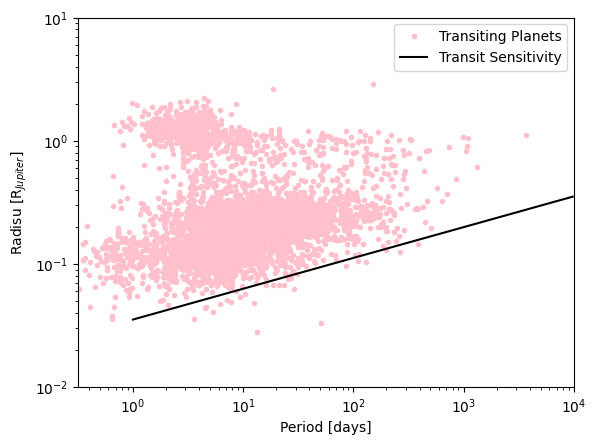

In [54]:
plt.plot(tab["pl_orbper"][Tsit], tab["pl_radj"][Tsit], ".", color = 'pink', label="Transiting Planets")
plt.plot(P_arr.value, R_p_arr.to(u.jupiterRad).value, color = "k", label = "Transit Sensitivity")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Period [days]")
plt.ylabel(r"Radisu [R$_{Jupiter}$]")
plt.xlim(10**(-0.5), 10**4)
plt.ylim(10**(-2),10**1)
plt.legend()

# Radial Velocity Sensitivity

### For a K value of 0.5 m/s, which is the state-of-the-art performance, the mass sensitivity is as follows for a range of semi major axis $a$, assuming 0.5 solar mass:

 $K = \frac{m_p}{m_\ast}\cdot\sqrt{\frac{Gm_\ast}{a}}\cdot\sin i$

Assuming an edge-on orbit, for which $i$ is 90 degree, rearrange the equation to be:

 $m_p = K \cdot m_\ast \cdot \sqrt{\frac{a}{Gm_\ast}}$

In [23]:
import astropy.constants as ac
import astropy.units as u

In [24]:
sma_arr = 10.0**(np.arange(5)-2) * u.AU

m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))

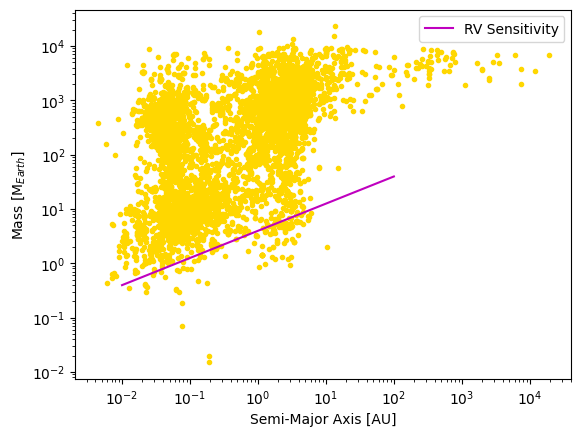

In [53]:
plt.plot(tab["pl_orbsmax"], tab["pl_bmasse"], ".", color = 'gold')
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), color="m", label = "RV Sensitivity")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Semi-Major Axis [AU]")
plt.ylabel(r"Mass [M$_{Earth}$]")
plt.legend()

## You may think about the conversin between mass and radius  when considering the sensitivity of other detection techniques.